<a href="https://colab.research.google.com/github/Osakana7777777/GaussianProcessAndML/blob/main/ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://chat.openai.com/share/8bdc8522-7394-4bef-971f-ca61c322d582

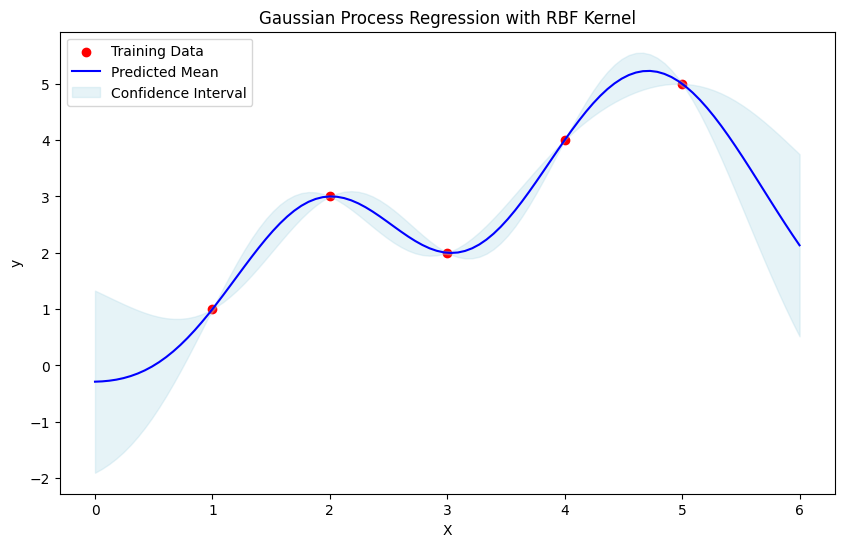

In [3]:
#このセルはChatGPTに書かせました．上記URL参照

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# トレーニングデータの作成
X_train = np.array([[1], [2], [3], [4], [5]])  # 入力データ
y_train = np.array([1, 3, 2, 4, 5])  # 出力データ

# カーネルとガウス過程回帰モデルの定義
kernel = RBF(length_scale=1.0)  # RBFカーネル
gp = GaussianProcessRegressor(kernel=kernel)

# モデルの学習
gp.fit(X_train, y_train)

# テストデータの作成
X_test = np.linspace(0, 6, 100).reshape(-1, 1)  # 入力データの範囲を指定

# 予測値の取得
y_pred, std = gp.predict(X_test, return_std=True)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_test, y_pred, color='blue', label='Predicted Mean')
plt.fill_between(X_test.flatten(), y_pred - 2 * std, y_pred + 2 * std, color='lightblue', alpha=0.3, label='Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression with RBF Kernel')
plt.legend()
plt.show()


すごい・・

#3.2 ガウス過程

##3.2.4 ガウス過程からのサンプル

In [5]:
#RBF kernel
def RBF(x1,x2,theta_1,theta_2):
  norm=np.sum((x1-x2)**2)
  return theta_1*np.exp(-norm/theta_2)


In [6]:
#(3.27)のKを求める
K=np.zeros((4,4))
for i in range(4):
  for j in range(4):
    K[i,j]=RBF(i+1,j+1,theta_1=1,theta_2=1)

np.set_printoptions(precision=4,suppress=True)#eを使わないで小数を表示

print(K)

L=np.linalg.cholesky(K)#コレスキー分解

print(L)

[[1.     0.3679 0.0183 0.0001]
 [0.3679 1.     0.3679 0.0183]
 [0.0183 0.3679 1.     0.3679]
 [0.0001 0.0183 0.3679 1.    ]]
[[1.     0.     0.     0.    ]
 [0.3679 0.9299 0.     0.    ]
 [0.0183 0.3884 0.9213 0.    ]
 [0.0001 0.0196 0.391  0.9202]]


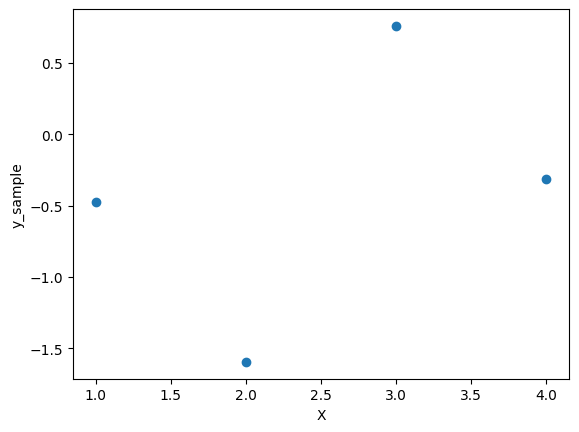

In [7]:
X=np.array([1,2,3,4])
mu=np.zeros(4)
sigma=K

y_sample=np.random.multivariate_normal(mu,sigma,1)

fig,ax=plt.subplots()
ax.scatter(X,y_sample)
plt.xlabel("X")
plt.ylabel("y_sample")
plt.show()

図3.8を描いてみる

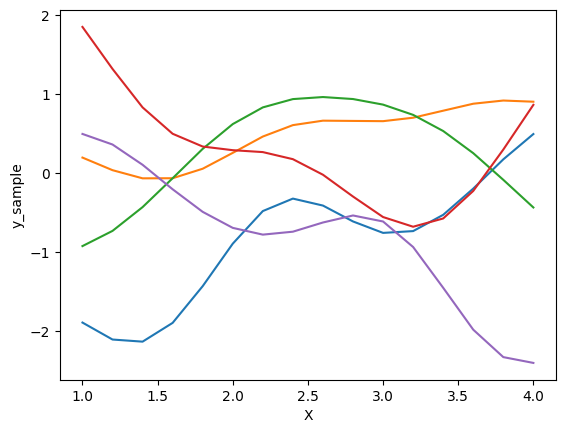

In [51]:
n=16

X=np.linspace(1,4,n)

K=np.zeros((n,n))
for i in range(n):
  for j in range(n):
    K[i,j]=RBF(X[i],X[j],theta_1=1,theta_2=1)

np.set_printoptions(precision=4,suppress=True)#eを使わないで小数を表示

#plt.imshow(K)


mu=np.zeros(n)
sigma=K

plt.figure()
for _ in range(5):

  y=np.random.multivariate_normal(mu,sigma,1)
  #print(y_sample.shape)
  y_sample=np.squeeze(y)

  
  plt.plot(X,y_sample)
  plt.xlabel("X")
  plt.ylabel("y_sample")

plt.show()